# Korea Gas and Electricity | Comprehensive EDA

 ## Overview
 The goal of this EDA is to explore the relationship between gas and electricity usage in Korea, with regards to the temperature during each month of the year and the province/location within the country. Additionally, we will explore other factors that may be affected by this energy usage. 
 <br> We will explore 9 provinces and 7 'special cities' (특별시) in Korea over the time frame of 2000 - 2020: a total of 252 months.
 <br><br> The provinces are as follows:
 <br> Gangwondo
<br> Gyeonggido
<br> Gyeongsangnamdo
<br> Gyeongsangbukdo
<br> Jeollanamdo
<br> Jeollabukdo
<br> Jeju
<br> Chungcheongnamdo
<br> Chungcheongbukdo
<br><br>
As well as 7 Special Cities:
<br> Seoul
<br> Incheon
<br> Gwangju
<br> Daegu
<br> Daejeon
<br> Busan
<br> Ulsan
 

## EDA
### Import: Data and relevant extensions

In [1]:
# Extensions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import date
%matplotlib inline

In [2]:
# Data
df = pd.read_excel('Data/Korea_Electricity_and_Gas.xlsx')

In [3]:
df.tail()

,Year,Month,Temperature,Gangwondo_Elec,Gyeonggido_Elec,Gyeongsangnamdo_Elec,Gyeongsangbukdo_Elec,Jeollanamdo_Elec,Jeollabukdo_Elec,Jeju_Elec,...,Jeju_Gas,Chungcheongnamdo_Gas,Chungcheongbukdo_Gas,Seoul_Gas,Incheon_Gas,Gwangju_Gas,Daegu_Gas,Daejeon_Gas,Busan_Gas,Ulsan_Gas
247,2020,8,27.0,2124.033292,6047.920142,4042.533815,5491.141819,3642.636243,852.167465,263.958548,...,1506,70181,49460,163032,70646,27561,45058,31906,70508,94251
248,2020,9,21.4,2384.992068,6285.545956,3114.591872,7348.436329,4337.585202,860.717918,342.911568,...,1179,86971,53589,147556,72542,28120,43042,30307,70849,101433
249,2020,10,14.9,1776.130300,5805.792953,2895.362806,7572.486565,4352.367656,615.960069,325.691095,...,1414,109095,61315,213556,78654,39428,44555,42001,85283,119332
250,2020,11,9.0,1850.304954,5313.923434,3585.310849,7461.364848,4270.667493,940.002218,310.686307,...,2161,142556,82499,375289,115663,58120,67054,69624,122943,147792
251,2020,12,0.8,1944.490212,4591.112244,3544.662667,6976.895050,3504.775275,795.419705,304.264909,...,4220,198939,114597,636178,179536,94589,101139,110897,200163,221037


Here, we can see there is the temperature(overall for the entire country) as well as the generated electricty and natural gas per region. I have also included the 'special cities (특별시), which are considered separate from each province.
<br><br>
Electricity is measured in Gigawatt hours (GWh), Gas is measured in Normal Cubic Meters (Nm3), and Temperature in Celcius (C).

### Checking for Missing Values

In [23]:
df.isna().sum()

Year                      0
Month                     0
Temperature               0
Gangwondo_Elec           24
Gyeonggido_Elec          24
Gyeongsangnamdo_Elec     24
Gyeongsangbukdo_Elec     24
Jeollanamdo_Elec         24
Jeollabukdo_Elec         24
Jeju_Elec                24
Chungcheongnamdo_Elec    24
Chungcheongbukdo_Elec    24
Seoul_Elec               24
Incheon_Elec             24
Gwangju_Elec             24
Daegu_Elec               24
Daejeon_Elec             24
Busan_Elec               24
Ulsan_Elec               24
Gangwondo_Gas             0
Gyeonggido_Gas            0
Gyeongsangnamdo_Gas       0
Gyeongsangbukdo_Gas       0
Jeollanamdo_Gas           0
Jeollabukdo_Gas           0
Jeju_Gas                  0
Chungcheongnamdo_Gas      0
Chungcheongbukdo_Gas      0
Seoul_Gas                 0
Incheon_Gas               0
Gwangju_Gas               0
Daegu_Gas                 0
Daejeon_Gas               0
Busan_Gas                 0
Ulsan_Gas                 0
dtype: int64

In [26]:
df.head()

,Year,Month,Temperature,Gangwondo_Elec,Gyeonggido_Elec,Gyeongsangnamdo_Elec,Gyeongsangbukdo_Elec,Jeollanamdo_Elec,Jeollabukdo_Elec,Jeju_Elec,...,Jeju_Gas,Chungcheongnamdo_Gas,Chungcheongbukdo_Gas,Seoul_Gas,Incheon_Gas,Gwangju_Gas,Daegu_Gas,Daejeon_Gas,Busan_Gas,Ulsan_Gas
0,2000,1,-1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,20158,27838,662424,139454,39465,86077,52992,85787,69241
1,2000,2,-0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,23492,27175,689177,145834,40674,84069,53950,87282,70910
2,2000,3,6.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,21156,22904,566528,121324,34610,76144,41898,74476,63627
3,2000,4,12.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,17447,16818,396231,91421,25898,62514,28618,58316,47106
4,2000,5,17.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,14508,12299,262940,67239,18426,46992,17503,45915,43749


We can see here that we are actually missing the first two years (24 months) of electrical data across the board. For now, we will just drop the values and start our analysis from the year 2002.

In [4]:
korea_data = df.dropna()
korea_data['DATE'] = pd.to_datetime(korea_data[['Year', 'Month']].assign(DAY=1))
korea_data.head()

,Year,Month,Temperature,Gangwondo_Elec,Gyeonggido_Elec,Gyeongsangnamdo_Elec,Gyeongsangbukdo_Elec,Jeollanamdo_Elec,Jeollabukdo_Elec,Jeju_Elec,...,Chungcheongnamdo_Gas,Chungcheongbukdo_Gas,Seoul_Gas,Incheon_Gas,Gwangju_Gas,Daegu_Gas,Daejeon_Gas,Busan_Gas,Ulsan_Gas,DATE
24,2002,1,1.04,4114.162138,13942.479350,48507.164290,49937.391610,43793.302280,1029.156074,1333.240947,...,39357,30473,723439,162432,45615,88611,59954,104771,88571,2002-01-01
25,2002,2,3.28,444.209358,1673.900665,4203.778381,3960.269005,3542.160746,56.614816,108.953851,...,34852,25755,647048,147925,40693,86216,57008,85813,79743,2002-02-01
26,2002,3,8.15,285.982348,1311.206603,3567.908104,4426.791474,2868.484153,68.429886,97.390591,...,32467,22368,519039,130706,39172,72382,47982,79998,71828,2002-03-01
27,2002,4,13.89,237.359806,1255.437126,4283.508449,4845.066155,3023.488143,85.461852,108.853700,...,27560,15377,376726,105653,29382,61988,32359,60434,65519,2002-04-01
28,2002,5,18.07,239.106381,1175.540685,4277.618093,3681.290064,3010.938166,55.178449,128.219171,...,23622,13084,236489,80465,21698,52117,22797,55696,60417,2002-05-01


### Initial Visualization
Let's take a look at how the data looks for electricity and gas, separated by region and time. We will focus on provinces first for now, so we'll use the 9 different province names!

In [5]:
# Separate into electricity and gas first
#locs = list(range(0,19)) + [35]
locs = list(range(0,12)) + [35]
elec = korea_data.iloc[:,locs]
elec.head()

,Year,Month,Temperature,Gangwondo_Elec,Gyeonggido_Elec,Gyeongsangnamdo_Elec,Gyeongsangbukdo_Elec,Jeollanamdo_Elec,Jeollabukdo_Elec,Jeju_Elec,Chungcheongnamdo_Elec,Chungcheongbukdo_Elec,DATE
24,2002,1,1.04,4114.162138,13942.479350,48507.164290,49937.391610,43793.302280,1029.156074,1333.240947,64560.187030,8.808194,2002-01-01
25,2002,2,3.28,444.209358,1673.900665,4203.778381,3960.269005,3542.160746,56.614816,108.953851,5298.546532,0.539968,2002-02-01
26,2002,3,8.15,285.982348,1311.206603,3567.908104,4426.791474,2868.484153,68.429886,97.390591,4339.560429,0.164717,2002-03-01
27,2002,4,13.89,237.359806,1255.437126,4283.508449,4845.066155,3023.488143,85.461852,108.853700,4694.627385,0.230607,2002-04-01
28,2002,5,18.07,239.106381,1175.540685,4277.618093,3681.290064,3010.938166,55.178449,128.219171,4911.964272,0.824801,2002-05-01


In [38]:
# Gas
#locs = list(range(0,3)) + list(range(19,36))
locs = list(range(0,3)) + list(range(19,28)) + [35]
gas = korea_data.iloc[:,locs]
gas.tail()

,Year,Month,Temperature,Gangwondo_Gas,Gyeonggido_Gas,Gyeongsangnamdo_Gas,Gyeongsangbukdo_Gas,Jeollanamdo_Gas,Jeollabukdo_Gas,Jeju_Gas,Chungcheongnamdo_Gas,Chungcheongbukdo_Gas,DATE
247,2020,8,27.0,19076,255222,60523,84646,49039,43885,1506,70181,49460,2020-08-01
248,2020,9,21.4,18822,243817,65264,88652,54253,48190,1179,86971,53589,2020-09-01
249,2020,10,14.9,25946,339823,75071,103757,60416,61328,1414,109095,61315,2020-10-01
250,2020,11,9.0,35632,497221,101609,135432,68793,82360,2161,142556,82499,2020-11-01
251,2020,12,0.8,57301,742863,149527,183273,97863,113880,4220,198939,114597,2020-12-01


In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Average Electricity Usage, by month, for each province

Let's take a look at the distribution of generated electricity from 2002 to 2020.

In [8]:
cols = []
for c in elec.columns:
    cols.append(c)
print(cols)

['Year', 'Month', 'Temperature', 'Gangwondo_Elec', 'Gyeonggido_Elec', 'Gyeongsangnamdo_Elec', 'Gyeongsangbukdo_Elec', 'Jeollanamdo_Elec', 'Jeollabukdo_Elec', 'Jeju_Elec', 'Chungcheongnamdo_Elec', 'Chungcheongbukdo_Elec', 'DATE']


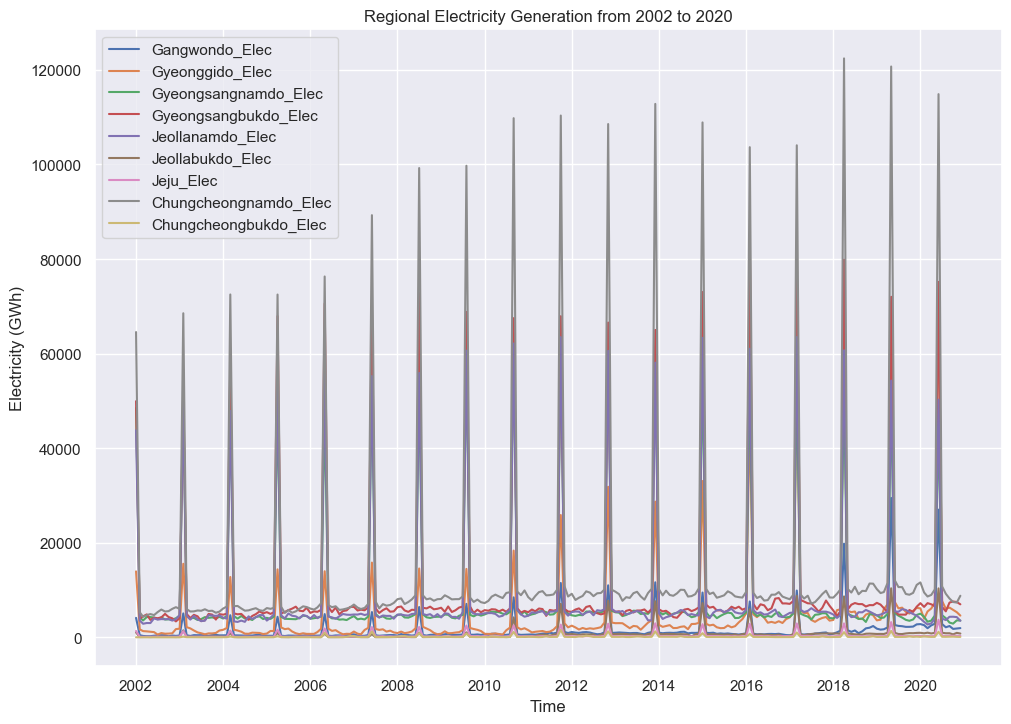

In [12]:
for i in range(3,12):
    plt.plot(elec['DATE'], elec.iloc[:,i], label=cols[i])
plt.legend()
plt.title('Regional Electricity Generation from 2002 to 2020')
plt.ylabel('Electricity (GWh)')
plt.xlabel('Time');

We can see here that despite fluctuating in very regular intervals per year, the magnitude of each year differs greatly in different provinces. Also, the scale of generated electricity varies greatly between provinces. 
<br><br>
For ease of viewing, let's also graph each province invidually.

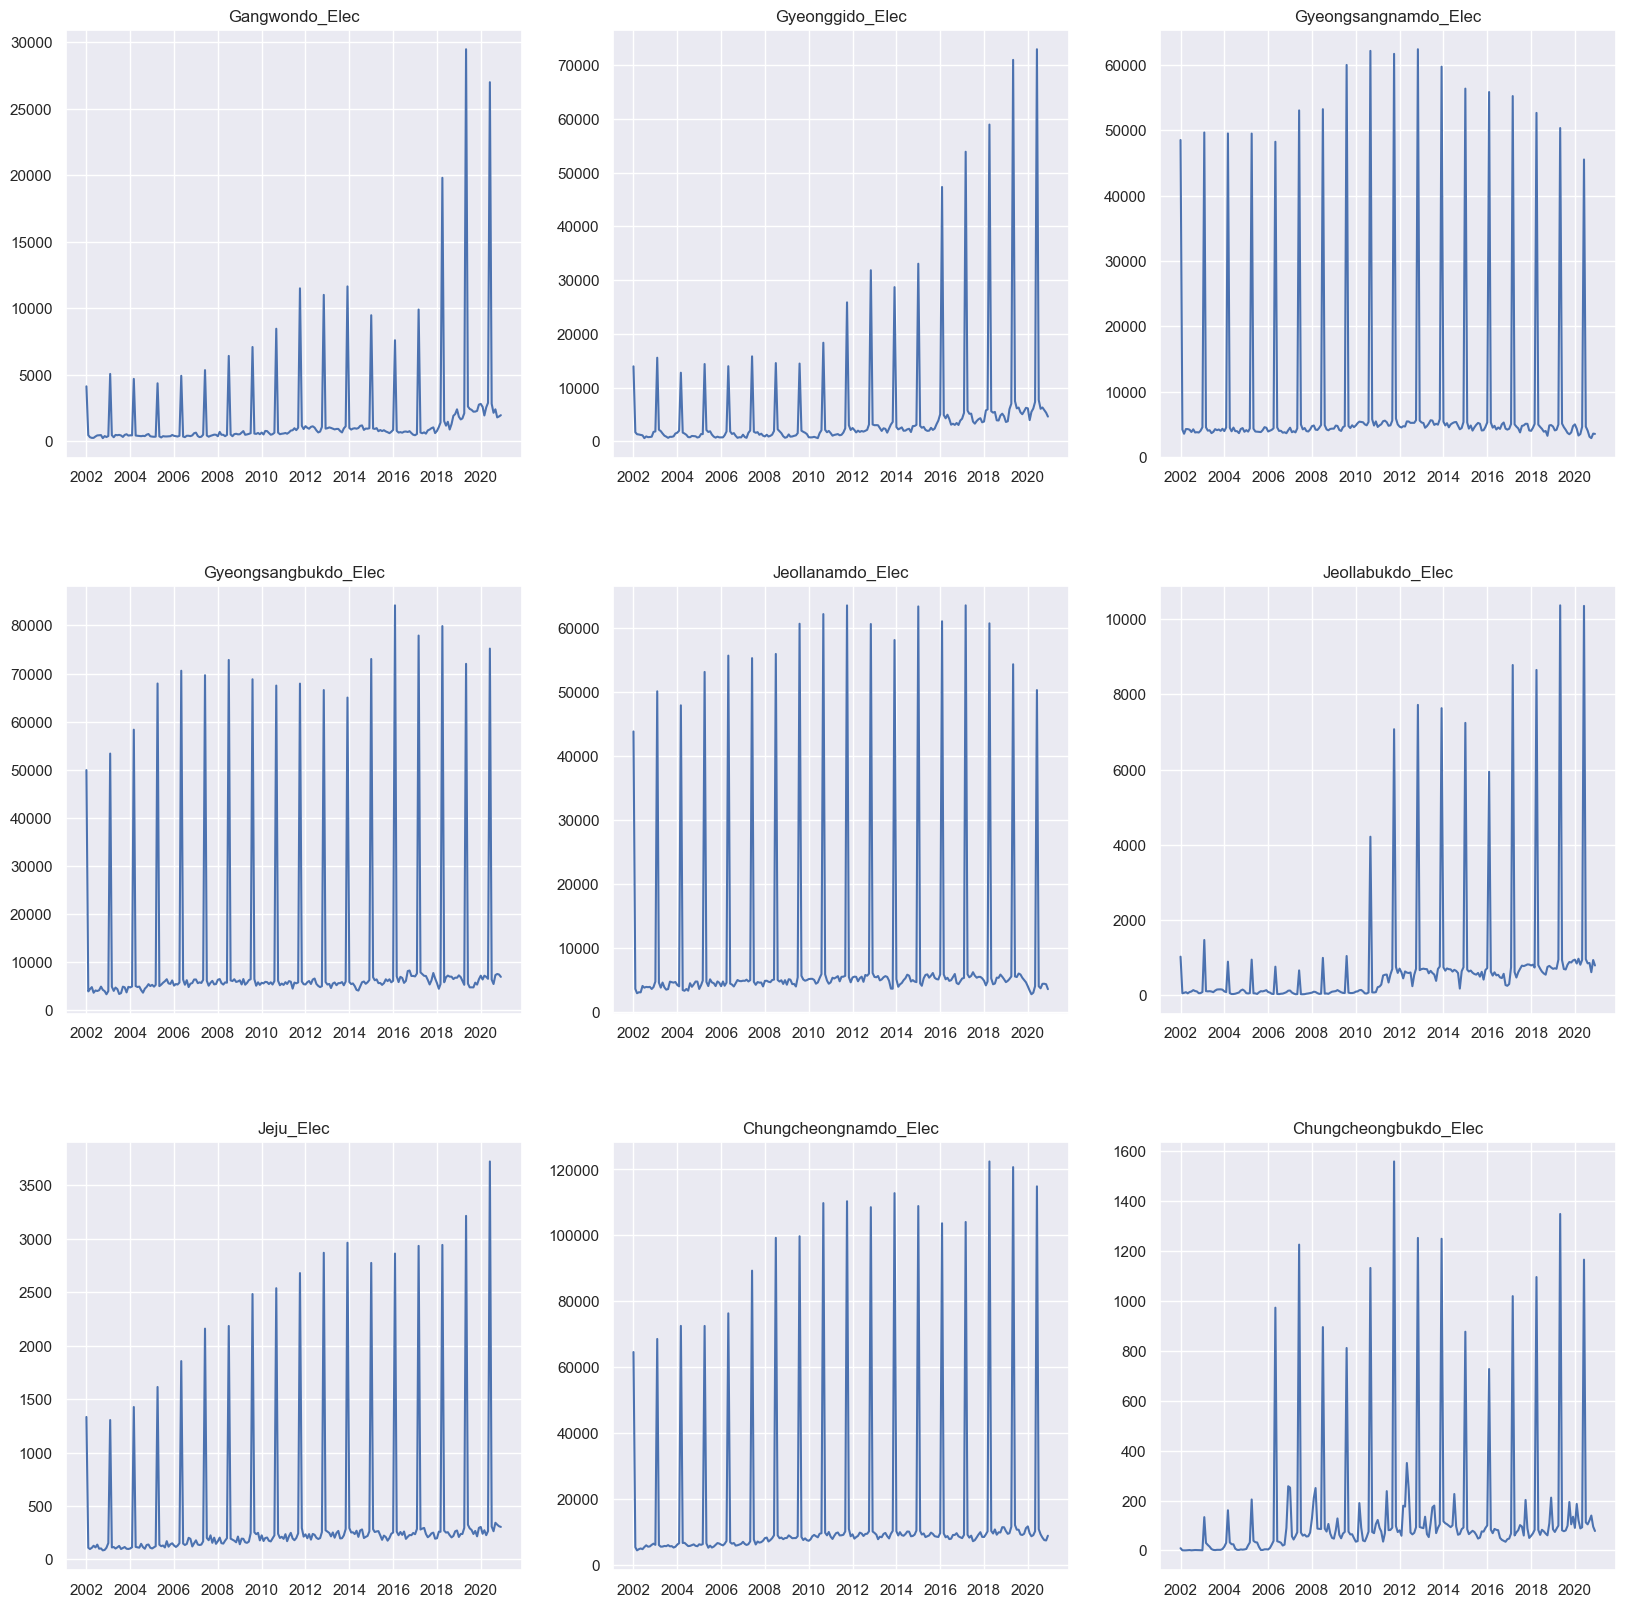

In [21]:
cols2 = []
for i in range (3,12):
    cols2.append(cols[i])

fig, axs = plt.subplots(3,3, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(9):

    axs[i].plot(elec['DATE'], elec.iloc[:,i+3], label=cols2[i])
    axs[i].set_title(cols2[i])


Again, we can see that the data fluctuates greatly, with a great deal of variance (in some provinces especially). Visually, the fluctuations appear to happen regularly, but seems to shift forward from year to year. This could indicate *<b>more than a year per cycle of fluctuation</b>*. We can also see that the troughs are also steadily trending upwards as time goes by. We will keep this in mind when choosing a model!

In [45]:
elec.head(20)

,Year,Month,Temperature,Gangwondo_Elec,Gyeonggido_Elec,Gyeongsangnamdo_Elec,Gyeongsangbukdo_Elec,Jeollanamdo_Elec,Jeollabukdo_Elec,Jeju_Elec,Chungcheongnamdo_Elec,Chungcheongbukdo_Elec,DATE
24,2002,1,1.04,4114.162138,13942.479350,48507.164290,49937.391610,43793.302280,1029.156074,1333.240947,64560.187030,8.808194,2002-01-01
25,2002,2,3.28,444.209358,1673.900665,4203.778381,3960.269005,3542.160746,56.614816,108.953851,5298.546532,0.539968,2002-02-01
26,2002,3,8.15,285.982348,1311.206603,3567.908104,4426.791474,2868.484153,68.429886,97.390591,4339.560429,0.164717,2002-03-01
27,2002,4,13.89,237.359806,1255.437126,4283.508449,4845.066155,3023.488143,85.461852,108.853700,4694.627385,0.230607,2002-04-01
28,2002,5,18.07,239.106381,1175.540685,4277.618093,3681.290064,3010.938166,55.178449,128.219171,4911.964272,0.824801,2002-05-01
29,2002,6,22.16,342.944343,1098.742644,4182.686018,4148.315863,4006.839930,89.129755,112.285657,4701.518162,1.409138,2002-06-01
30,2002,7,25.14,422.307624,576.949910,3835.537257,4039.224177,3741.308195,103.845539,138.464039,5335.090355,0.288234,2002-07-01
31,2002,8,24.31,430.103026,896.388665,4242.488225,4205.766380,3855.131169,140.359334,100.341061,5872.373222,0.943571,2002-08-01
32,2002,9,21.52,445.964691,761.179648,3761.203565,4948.690502,3818.461929,115.506165,102.753645,5452.142010,1.568546,2002-09-01
33,2002,10,13.41,217.691082,784.605893,3804.702587,4285.164256,3860.178685,104.407974,84.803410,5538.609589,1.206970,2002-10-01


Looking into the data, we can actually see that the peak electricity generation happens *<b>every 13 months</b>*.

### Average Gas Usage, by month, for each province

We will repeat the process, this time looking at the gas usage per province, over the course of 19 years.

In [39]:
cols = []
for c in gas.columns:
    cols.append(c)
print(cols)

['Year', 'Month', 'Temperature', 'Gangwondo_Gas', 'Gyeonggido_Gas', 'Gyeongsangnamdo_Gas', 'Gyeongsangbukdo_Gas', 'Jeollanamdo_Gas', 'Jeollabukdo_Gas', 'Jeju_Gas', 'Chungcheongnamdo_Gas', 'Chungcheongbukdo_Gas', 'DATE']


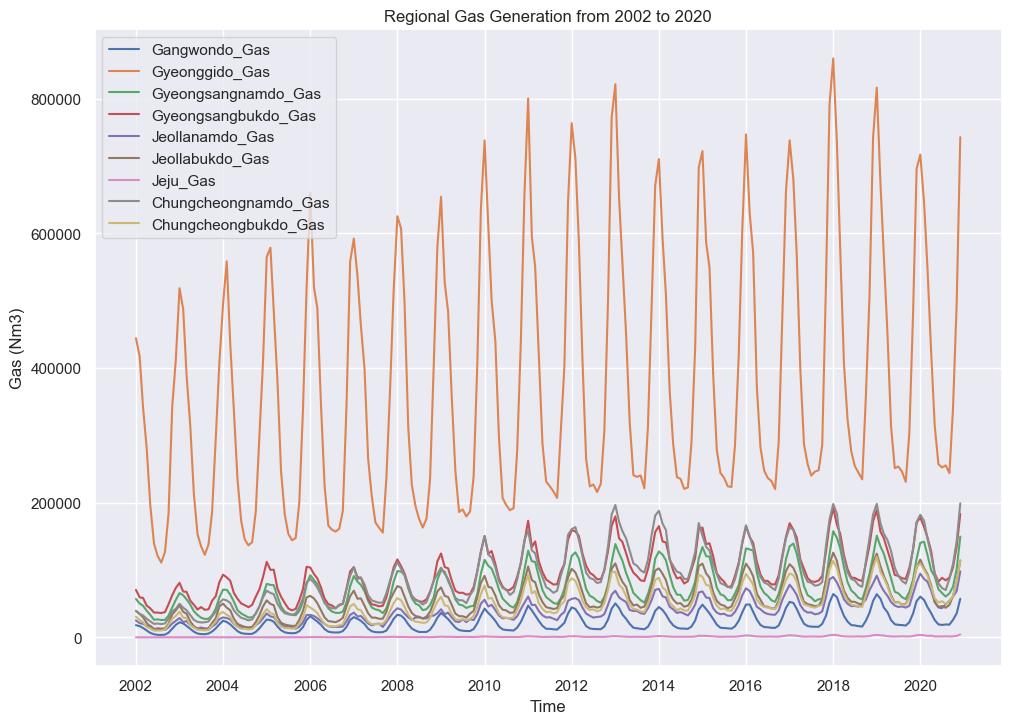

In [42]:
for i in range(3,12):
    plt.plot(gas['DATE'], gas.iloc[:,i], label=cols[i])
plt.legend()
plt.title('Regional Gas Generation from 2002 to 2020')
plt.ylabel('Gas (Nm3)')
plt.xlabel('Time');

Wow! The gas data looks much cleaner, but still has similar yearly fluctuations in generation. We can see here that the province, 'Gyeonggido', uses much more gas than the other provinces. This makes sense, as it is the most populated province in Korea.

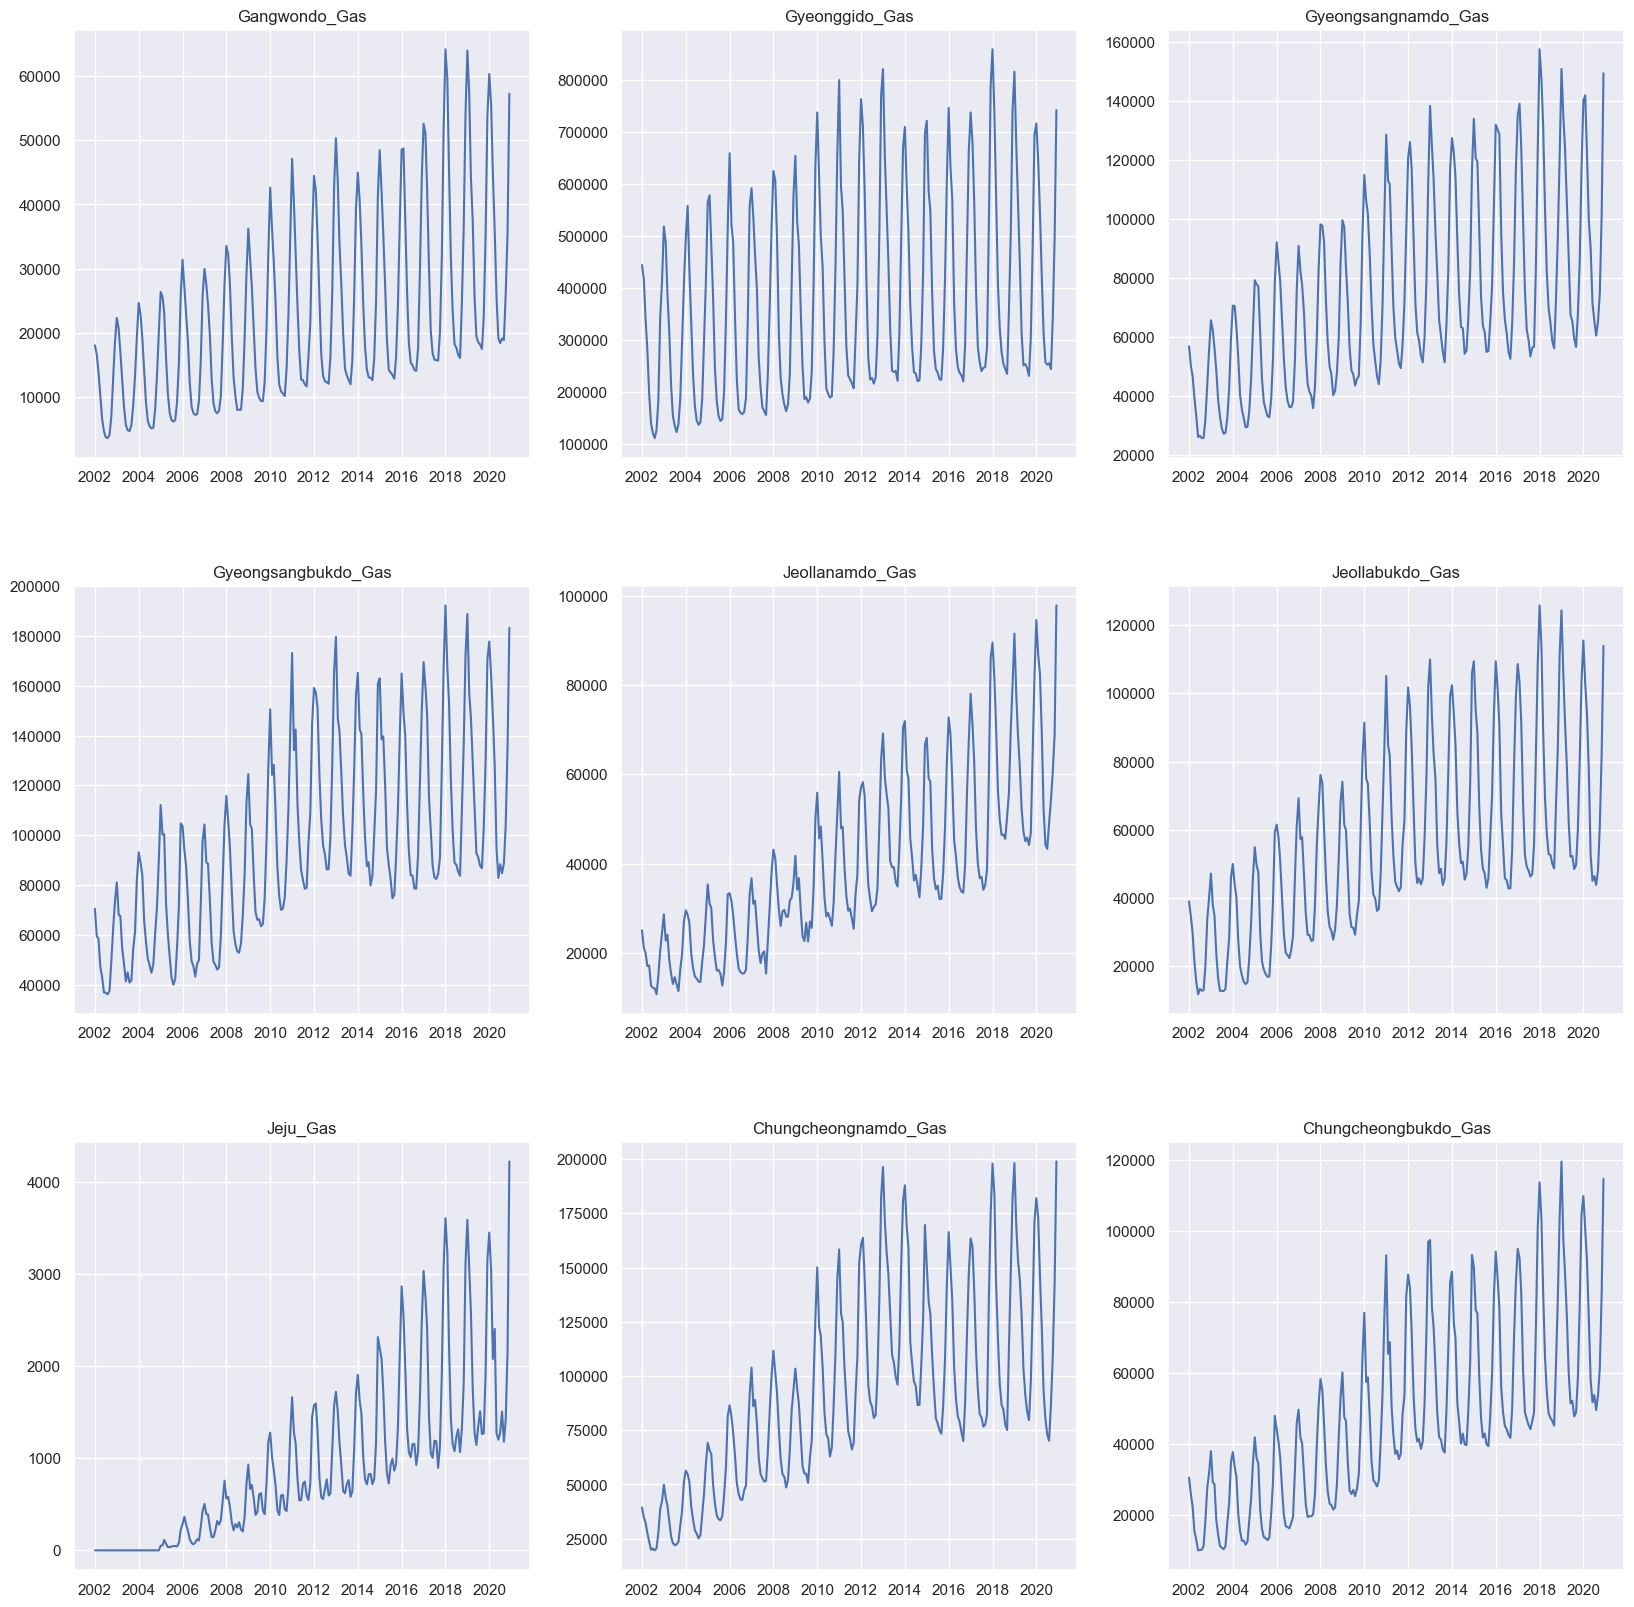

In [43]:
cols2 = []
for i in range (3,12):
    cols2.append(cols[i])

fig, axs = plt.subplots(3,3, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.2)

axs = axs.ravel()

for i in range(9):

    axs[i].plot(gas['DATE'], gas.iloc[:,i+3], label=cols2[i])
    axs[i].set_title(cols2[i])

Checking the data again to see when the peaks happen:

In [46]:
gas.head(20)

,Year,Month,Temperature,Gangwondo_Gas,Gyeonggido_Gas,Gyeongsangnamdo_Gas,Gyeongsangbukdo_Gas,Jeollanamdo_Gas,Jeollabukdo_Gas,Jeju_Gas,Chungcheongnamdo_Gas,Chungcheongbukdo_Gas,DATE
24,2002,1,1.04,18001,444297,56890,70413,25014,39060,0,39357,30473,2002-01-01
25,2002,2,3.28,16547,417268,50189,59324,21067,34579,0,34852,25755,2002-02-01
26,2002,3,8.15,13898,342306,46879,58515,19969,29838,0,32467,22368,2002-03-01
27,2002,4,13.89,10149,280578,39471,47116,17025,21297,0,27560,15377,2002-04-01
28,2002,5,18.07,6541,196282,33363,42949,17139,15558,0,23622,13084,2002-05-01
29,2002,6,22.16,4567,139388,26117,36784,12624,11863,0,19939,9982,2002-06-01
30,2002,7,25.14,3641,121043,26563,36678,12150,13412,0,20464,10091,2002-07-01
31,2002,8,24.31,3504,110926,25748,36088,12038,12927,0,19628,10160,2002-08-01
32,2002,9,21.52,3969,126622,25833,37373,10699,13057,0,20602,11203,2002-09-01
33,2002,10,13.41,6818,183247,32127,49095,14849,20202,0,27685,18329,2002-10-01


And in this case, the peaks follow a more regular pattern, happening *<b>every year during the cold months, around October to March.</b>*

## Initial Takeaway

Let look back on what we've been able to glean from the information so far: <br>
1. Both the electricity and gas data show regular patterns of fluctuation based on consumption. <br>
2. The *<b>electricity usage hits a peak every 13 months</b>* (which is a bit strange, as it doesn't seem to follow seasons, but instead follows a consistent cycle)<br> 
3. The *<b>gas usage peaks in colder weather</b>* (around October to March) every year. <br> 
4. Both datasets show an upward trend of generation as time goes on.

<Axes: xlabel='Temperature', ylabel='Gyeonggido_Gas'>

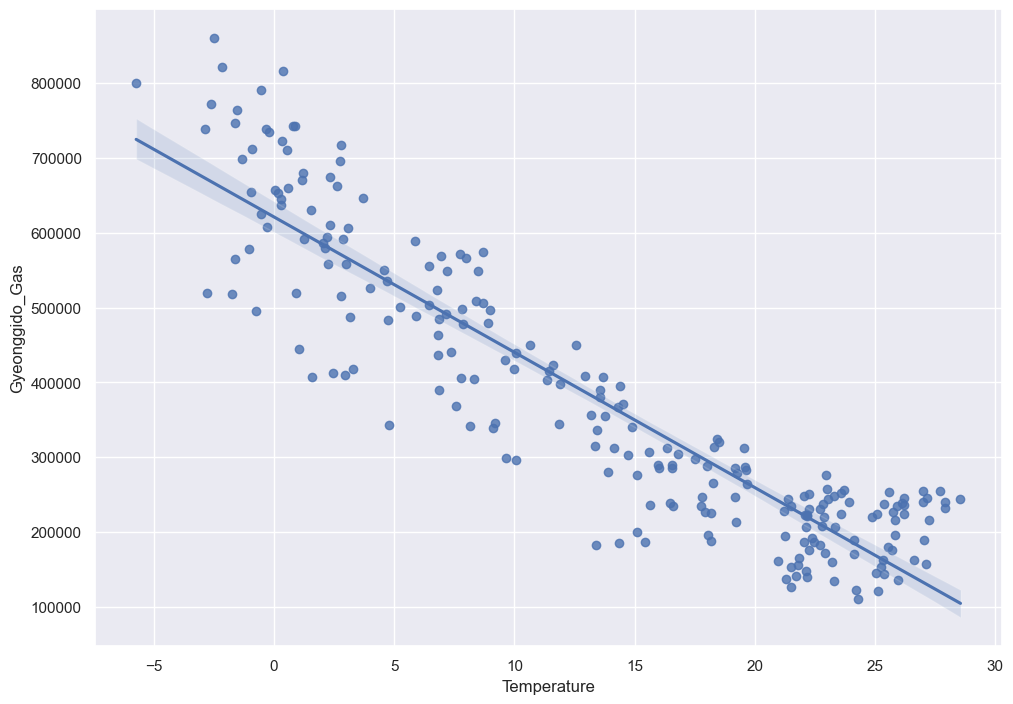

In [60]:
#sns.scatterplot(y=gas['Gangwondo_Gas'], x=gas['Temperature'])
sns.regplot(y=gas['Gyeonggido_Gas'], x=gas['Temperature'])

<Axes: xlabel='Temperature', ylabel='Chungcheongnamdo_Elec'>

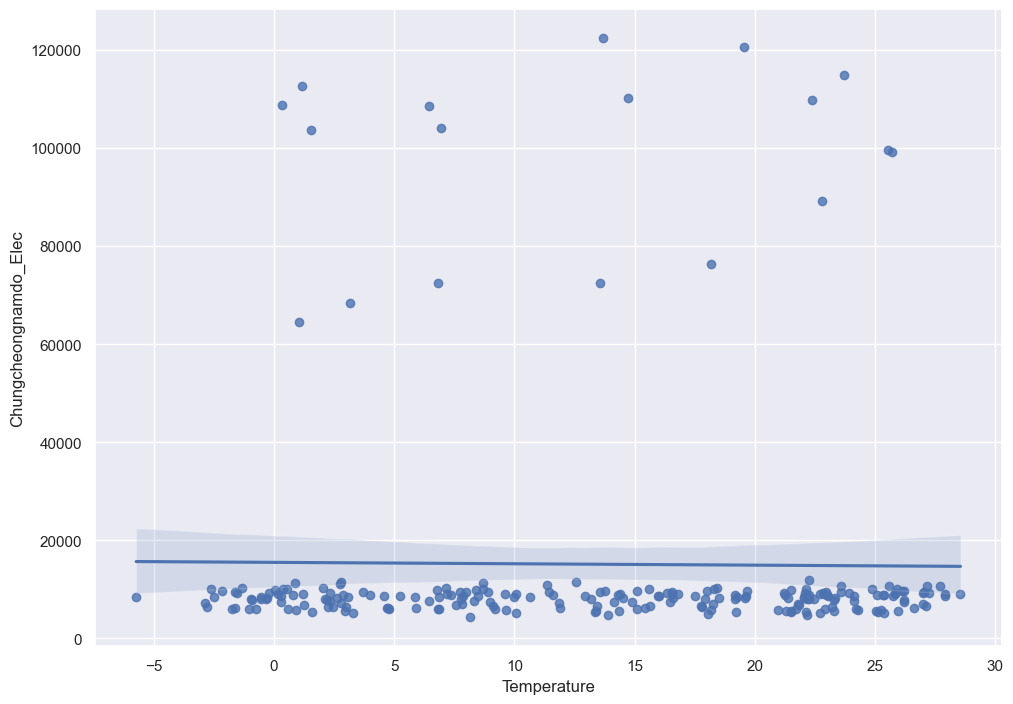

In [64]:
sns.regplot(y=elec['Chungcheongnamdo_Elec'], x=elec['Temperature'])

# Stuff I've played around with but not sure if it's useful

In [ ]:
elecm = elec.drop(columns=['Month', 'Year', 'Temperature'])
elecm = elecm.melt(['DATE'], var_name='Locations', value_name='Amount')

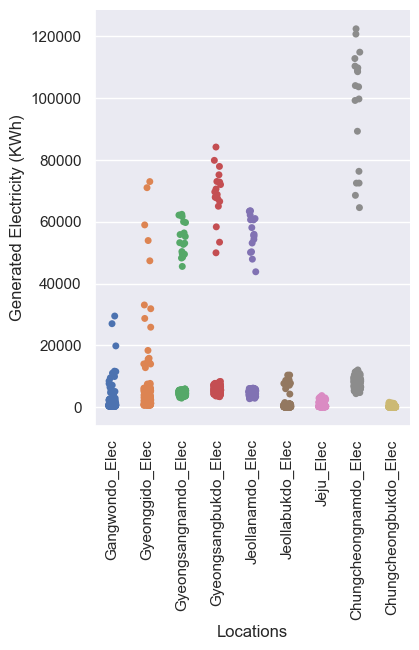

In [160]:
h = sns.catplot(x='Locations', y='Amount', data=dfm, hue='Locations')
plt.ylabel('Generated Electricity (KWh)')
plt.xticks(rotation=90);

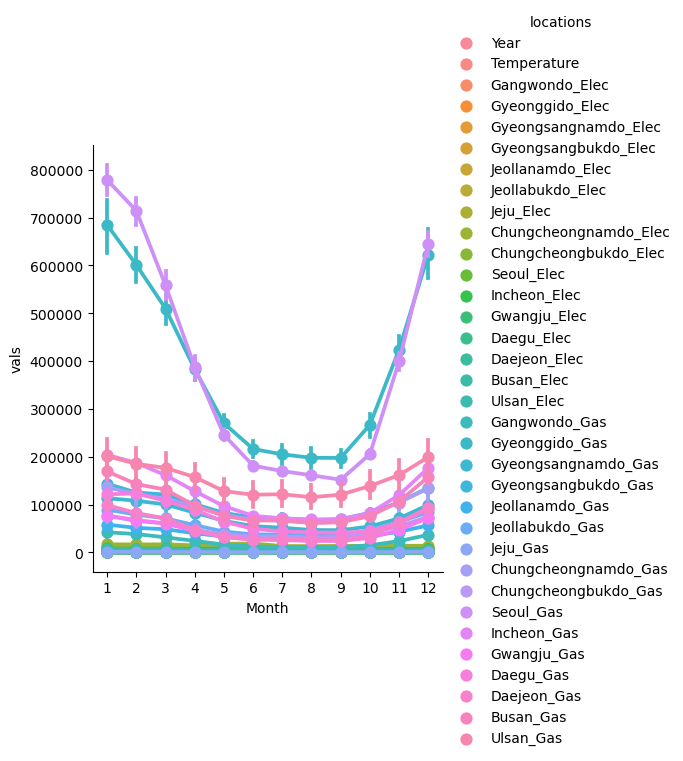

In [33]:
dfm = korea_data.melt('Month', var_name='locations', value_name='vals')
g = sns.catplot(x="Month", y="vals", hue='locations', data=dfm, kind='point')